In [84]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.layers import BatchNormalization
import keras
from keras.layers.convolutional import Conv2D
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix
import seaborn as sns
from keras.layers.convolutional import MaxPooling2D

np.random.seed(0)

In [85]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [86]:

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


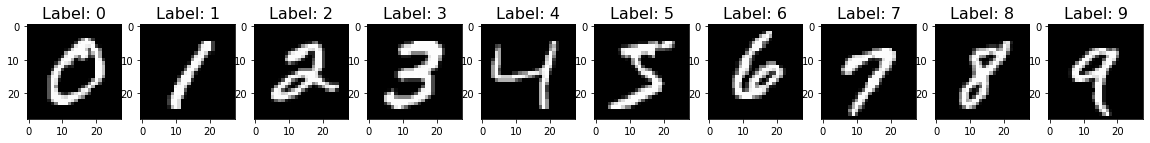

In [87]:
num_classes = 10
f, ax = plt.subplots(1, num_classes, figsize=(20,20))

for i in range(0, num_classes):
  sample = x_train[y_train == i][0]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title("Label: {}".format(i), fontsize=16)

In [88]:

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [89]:

# Normalize Data
x_train = x_train / 255.0
x_test = x_test / 255.0
     

In [90]:

# Reshape Data
#x_train = x_train.reshape(x_train.shape[0], -1)
#x_test = x_test.reshape(x_test.shape[0], -1)
print(x_train.shape)

(60000, 28, 28)


In [91]:
model = Sequential()

model.add(Conv2D(32, 3, activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(Conv2D(64, 3, activation='relu', padding='same'))
model.add(MaxPooling2D(2, 2))
model.add(BatchNormalization())

model.add(Conv2D(128, 3, activation='relu', padding='same'))
model.add(Conv2D(128, 3, activation='relu', padding='same'))
model.add(MaxPooling2D(2, 2))
model.add(BatchNormalization())

model.add(Conv2D(256, 3, activation='relu', padding='same'))
model.add(Conv2D(256, 3, activation='relu', padding='same'))
model.add(Conv2D(256, 3, activation='relu', padding='same'))
model.add(MaxPooling2D(2, 2))
model.add(BatchNormalization())

model.add(Conv2D(512, 3, activation='relu', padding='same'))
model.add(Conv2D(512, 3, activation='relu', padding='same'))
model.add(Conv2D(512, 3, activation='relu', padding='same'))
model.add(MaxPooling2D(2, 1)) # default stride is 2
model.add(BatchNormalization())

model.add(Conv2D(512, 3, activation='relu', padding='same'))
model.add(Conv2D(512, 3, activation='relu', padding='same'))
model.add(Conv2D(512, 3, activation='relu', padding='same'))
model.add(MaxPooling2D(2, 1)) # default stride is 2
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_71 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 conv2d_72 (Conv2D)          (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 batch_normalization_25 (Bat  (None, 14, 14, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_73 (Conv2D)          (None, 14, 14, 128)       73856     
                                                                 
 conv2d_74 (Conv2D)          (None, 14, 14, 128)     

In [92]:
model.compile(loss='categorical_crossentropy',
             optimizer='nadam',
             metrics=['accuracy'])

In [93]:

batch_size = 512
epochs=10
model.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=epochs)
     

Epoch 1/10
118/118 [==============================] - 491s 4s/step - loss: 1.1286 - accuracy: 0.7079
Epoch 2/10
118/118 [==============================] - 464s 4s/step - loss: 0.0896 - accuracy: 0.9757
Epoch 3/10
118/118 [==============================] - 449s 4s/step - loss: 0.2026 - accuracy: 0.9527
Epoch 4/10
118/118 [==============================] - 447s 4s/step - loss: 0.0349 - accuracy: 0.9905
Epoch 5/10
118/118 [==============================] - 450s 4s/step - loss: 0.0241 - accuracy: 0.9931
Epoch 6/10
118/118 [==============================] - 449s 4s/step - loss: 0.5726 - accuracy: 0.8339
Epoch 7/10
118/118 [==============================] - 450s 4s/step - loss: 0.0506 - accuracy: 0.9868
Epoch 8/10
118/118 [==============================] - 463s 4s/step - loss: 0.2525 - accuracy: 0.9635
Epoch 9/10


KeyboardInterrupt: 

In [94]:

test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Loss: {}, Test Accuracy: {}".format(test_loss, test_acc))

313/313 [==============================] - 53s 169ms/step - loss: 0.0453 - accuracy: 0.9887
Test Loss: 0.04525759443640709, Test Accuracy: 0.9886999726295471


In [95]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(y_pred)
print(y_pred_classes)

313/313 [==============================] - 53s 167ms/step
[[1.6227312e-09 2.1641845e-06 7.9657360e-07 ... 9.9998814e-01
  1.4321507e-09 7.7980549e-06]
 [4.1780325e-08 3.2557381e-07 9.9999493e-01 ... 3.0745277e-06
  3.5170689e-08 5.1045779e-10]
 [1.8724984e-09 9.9997777e-01 4.7707192e-07 ... 2.1466949e-05
  4.4531268e-09 8.1550700e-10]
 ...
 [1.3122458e-09 4.3909418e-07 4.2722159e-10 ... 9.0914511e-09
  5.2316119e-07 5.1263278e-06]
 [4.1082469e-05 1.4879914e-08 1.4144029e-05 ... 1.0644291e-06
  5.4299344e-05 6.2150750e-05]
 [3.1518370e-03 6.7695981e-04 6.1828934e-04 ... 2.3103775e-04
  4.1500703e-03 6.4328997e-03]]
[7 2 1 ... 4 5 6]


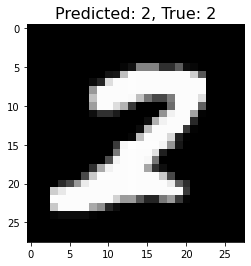

In [100]:

# Single Example
random_idx = np.random.choice(len(x_test))
x_sample = x_test[random_idx]
y_true = np.argmax(y_test, axis=1)
y_sample_true = y_true[random_idx]
y_sample_pred_class = y_pred_classes[random_idx]

plt.title("Predicted: {}, True: {}".format(y_sample_pred_class, y_sample_true), fontsize=16)
plt.imshow(x_sample.reshape(28, 28), cmap='gray')

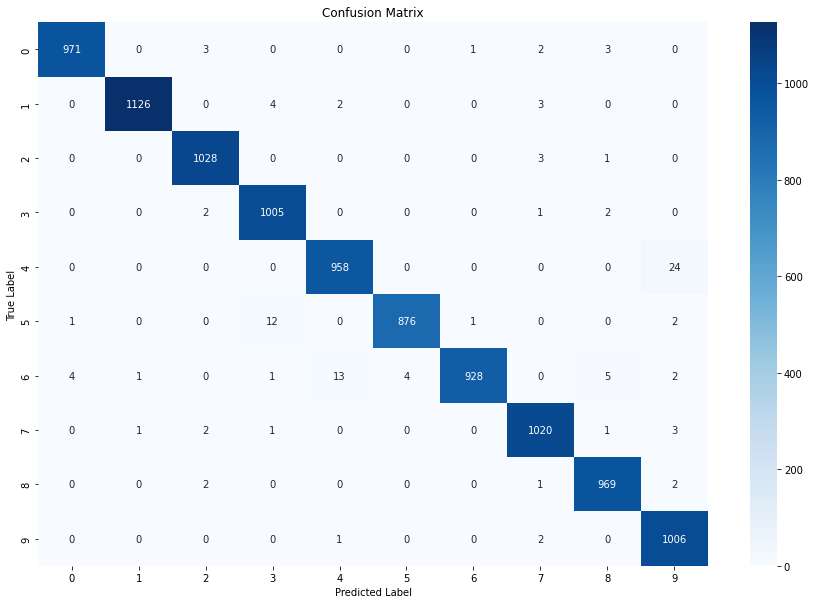

In [102]:

confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# Plot
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(confusion_mtx, annot=True, fmt='d', ax=ax, cmap="Blues")
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix');